<a href="https://colab.research.google.com/github/sanikanarmitwar/MusicGenreClassification/blob/main/musicgenreIMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
from zipfile import ZipFile
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving images_original.zip to images_original.zip


In [ ]:
# extracts the data from zip file and stores in directory extract_path
def extract_zip(zip_path, extract_path):
    with ZipFile(zip_path, 'r') as zip_ref: #opens zip file in read mode
        zip_ref.extractall(extract_path)

def display_images(folder_path):
    exts = ['.png']

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            directory_name = root.split('/')[-1]
            file_path = os.path.join(root, file)    #root stores current directory being traversed while file stores file name
            if any(file.lower().endswith(ext) for ext in exts):  # checking extension of file
                img = cv2.imread(file_path)
                # cv2_imshow(img)
# store zip file path in zipfile
file = "images_original.zip"
extfolder = "extracted_folder"

# extract the contents of the zip file
extract_zip(file, extfolder)

# display images in the extracted folder
display_images(extfolder)

999
(288, 432, 3)
999


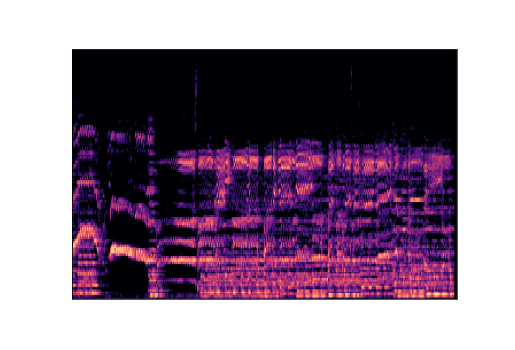

In [ ]:
X = []
y = []
exts = ['.png']
for root, dirs, files in os.walk(extfolder):
    for file in files:
        label = root.split('/')[-1]
        file_path = os.path.join(root, file)    #root stores current directory being traversed while file stores file name
        if any(file.lower().endswith(ext) for ext in exts):  # checking extension of file
            img = cv2.imread(file_path, cv2.IMREAD_COLOR)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            np_img = np.array(img)
            X.append(np_img)
            y.append(label)
print(len(X))
print(X[0].shape)
print(len(y))
plt.imshow(X[0])
plt.axis('off')
plt.show()

In [ ]:
#flattening the image
X_flat = []
for i in range(len(X)):
    X_flat.append(X[i].reshape(-1))
print(len(X_flat))
print(X_flat[0].shape)

999
(373248,)


In [ ]:
#train test split
X_flatnp = np.array(X_flat)
y_np = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X_flatnp, y_np, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (699, 373248)
Shape of y_train: (699,)
Shape of X_test: (300, 373248)
Shape of y_test: (300,)


In [ ]:
def getpca(n_components, X_train):
    p = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)
    return p

In [ ]:
n_components = 699
pca = getpca(n_components, X_train)

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.show()